# Finding Local Peaks in Solar Data
- https://docs.sunpy.org/en/stable/generated/gallery/plotting/finding_local_peaks_in_solar_data.html

Detecting intensity peaks in solar images can be useful, for example as
a simple flare identification mechanism. This example illustrates detection
of areas where there is a spike in solar intensity.
We use the `skimage.feature.peak_local_max` function in the scikit-image library
to find those regions in the map data where the intensity values form a local maxima.
Then we plot those peaks in the original AIA plot.

In [ ]:
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max

import astropy.units as u

import sunpy.map
from sunpy.data.sample import AIA_193_IMAGE
from sunpy.map.maputils import all_pixel_indices_from_map

We will first create a Map using some sample data and display it.

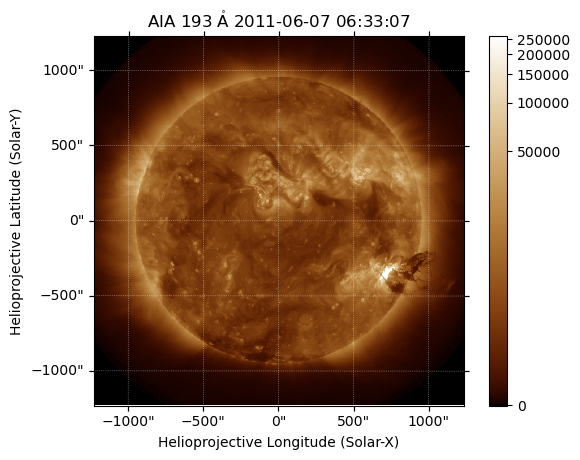

In [ ]:
aiamap = sunpy.map.Map(AIA_193_IMAGE)
fig = plt.figure()
ax = fig.add_subplot(projection=aiamap)
aiamap.plot(axes=ax)
plt.colorbar()
plt.show()

Before we find regions of local maxima, we need to create some variables to
store pixel values for the 2D SDO/AIA data we are using.
These variables are used for plotting in 3D later on.

In [ ]:
X, Y = all_pixel_indices_from_map(aiamap)

We will only consider peaks within the AIA data that have minimum intensity
value equal to ``threshold_rel * max(Intensity)`` which is 20% of the maximum intensity.
The next step is to calculate the pixel locations of local maxima
positions where peaks are separated by at least ``min_distance = 60 pixels``.
This function comes from scikit image and the documentation is found
here `skimage.feature.peak_local_max`.

In [ ]:
coordinates = peak_local_max(aiamap.data, min_distance=60, threshold_rel=0.2)

In [ ]:
coordinates

array([[365, 808],
       [629, 735],
       [592, 123],
       [632, 842],
       [582, 460],
       [573, 587]])

We now check for the indices at which we get such a local maxima and plot
those positions marked red in the aiamap data.

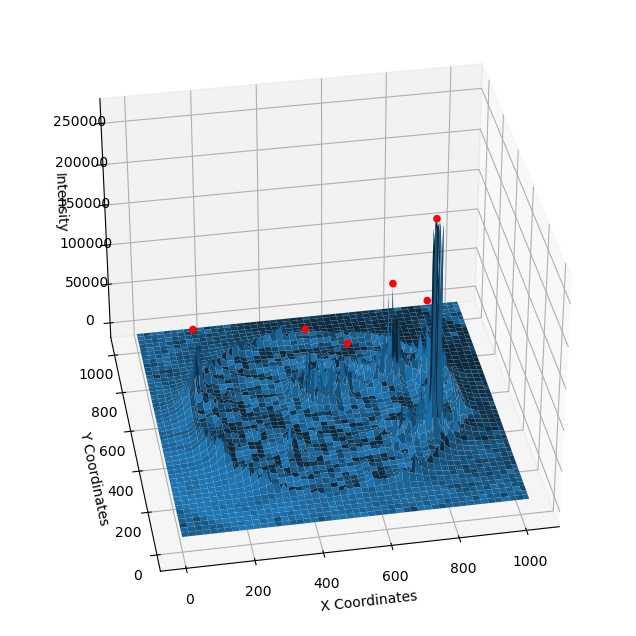

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, aiamap.data)
ax.view_init(elev=35, azim=-100)
peaks_pos = aiamap.data[coordinates[:, 0], coordinates[:, 1]]
ax.scatter(coordinates[:, 1], coordinates[:, 0], peaks_pos, color='r', alpha=1)
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')
ax.set_zlabel('Intensity')
plt.show()

Now we need to turn the pixel coordinates into the world location so
they can be easily overlaid on the Map.

In [ ]:
hpc_max = aiamap.wcs.pixel_to_world(coordinates[:, 1]*u.pixel, coordinates[:, 0]*u.pixel)
hpc_max

<SkyCoord (Helioprojective: obstime=2011-06-07T06:33:08.840, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2011-06-07T06:33:08.840, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.00405795, 0.04788327, 1.51846027e+11)>): (Tx, Ty) in arcsec
    [( 715.65988791, -350.91002278), ( 539.61497706,  283.31364268),
     (-930.94466985,  192.95106916), ( 796.72946271,  290.77495832),
     (-121.10595628,  169.7209177 ), ( 184.10021508,  148.39442865)]>

Finally we do an AIA plot to check for the local maxima locations
which will be marked with a blue x-label.

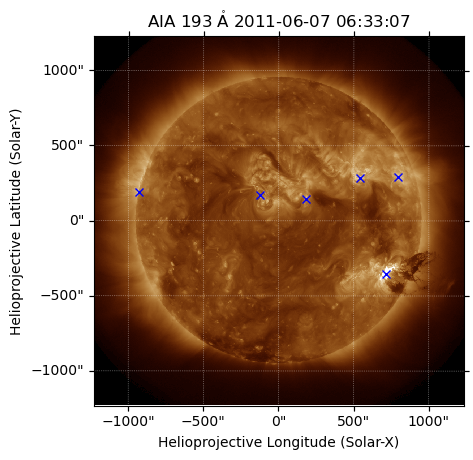

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection=aiamap)
aiamap.plot(axes=ax)
ax.plot_coord(hpc_max, 'bx')

plt.show()